# [Problem 1](https://projecteuler.net/problem=1)
---
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.  
Find the sum of all the multiples of 3 or 5 below 1000.

## Brute Force
---

In [1]:
def natural3and5Brute(upper=1000):
    output = 0
    for i in range(1,upper):
        if i % 3 == 0:
            output += i
            continue
        if i % 5 == 0:
            output += i
            continue
    return output

In [2]:
natural3and5Brute()

233168

I believe this has O(n) complexity.

## More Elegant
---
If $n$ is the maximum value, the sum of the multiples can be represented as such:
$$(3 + 6 + 9 + ... \left \lfloor{\frac{x}{3}}\right \rfloor \times 3 ) + (5 + 10 + 15 + ... + \left \lfloor{\frac{x}{5}}\right \rfloor \times 5) - (15 + 30 + 45 + ... + \left \lfloor{\frac{x}{15}}\right \rfloor \times 15)$$
where $\left \lfloor{x}\right \rfloor$ is the floor function, returning the largest integer not greater than $x$The first term is the sum of natural numbers divisible by 3, the second term is the sum of numbers divisible by 5, and the last term are the terms that are repeated in the first two terms.We can rewrite this as
$$3\times(1+ 2 +3 +... \left \lfloor{\frac{x}{3}}\right \rfloor) + 5 \times (1 + 2 + 3 +... + \left \lfloor{\frac{x}{5}}\right \rfloor) - 15 \times (1 + 2 + 3 + ... + \left \lfloor{\frac{x}{15}}\right \rfloor)$$
Now each term contains a [sum of sequential integers](http://math.stackexchange.com/questions/2260/proof-for-formula-for-sum-of-sequence-123-ldotsn) which is easily calculated
$$ 3 \times \frac{\left \lfloor{\frac{n}{3}}\right \rfloor (\left \lfloor{\frac{n}{3}}\right \rfloor +1)}{2} +
5 \times \frac{\left \lfloor{\frac{n}{5}}\right \rfloor (\left \lfloor{\frac{n}{5}}\right \rfloor +1)}{2} -
15 \times \frac{\left \lfloor{\frac{n}{15}}\right \rfloor (\left \lfloor{\frac{n}{15}}\right \rfloor +1)}{2}
$$

In [3]:
import math
def natural3and5(upper=1000):
    floor3 = math.floor((upper-1)/3)
    floor5 = math.floor((upper-1)/5)
    floor15 = math.floor((upper-1)/15)
    output = 3 * (floor3 * (floor3+1))/2 + 5 * (floor5 * (floor5 + 1))/2 - 15 * (floor15 * (floor15 + 1))/2
    return output

I believe this has O(1) complexity.

In [4]:
natural3and5()

233168.0

In [5]:
natural3and5(5000)

5829168.0

## ToDo
---
1. Benchmarks
2. Can you make the divisors inputs and calulate the common term?
3. More than 2 Divisors?

In [6]:
elegant = []
brute = []
for i in [10**x for x in range(1,5)]:
    tmp = %timeit -o natural3and5(i)
    elegant.append(tmp.all_runs[0]/tmp.loops)
    tmp = %timeit -o natural3and5Brute(i)
    brute.append(tmp.all_runs[0]/tmp.loops)

913 ns ± 40.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.28 µs ± 27.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
940 ns ± 26.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
10.2 µs ± 562 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.04 µs ± 47.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
113 µs ± 5.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.1 µs ± 39.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.1 ms ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
elegant

[9.807205490069464e-07,
 9.883321441011504e-07,
 1.097566838026978e-06,
 1.1444070260040461e-06]

In [8]:
brute

[1.3289846879197284e-06,
 1.1241951299598441e-05,
 0.00012370106760645284,
 0.0011370176250347867]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

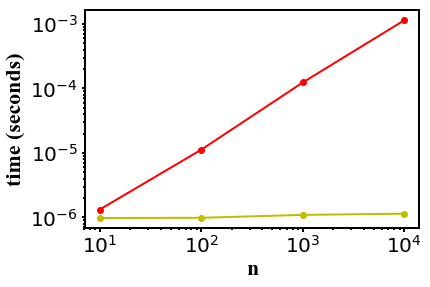

In [10]:
y = [10**x for x in range(1,5)]

# Create plot
fig = plt.subplot()
fig.loglog(y,elegant,'yo-',linewidth=2)
fig.loglog(y,brute,'ro-',linewidth=2)

# Label it and make it pretty
myfont = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}

fig.set_xlabel('n', **myfont)
fig.set_ylabel('time (seconds)',**myfont)
fig.tick_params(axis='both',which='both',labelsize=20,width=2)
[fig.spines[x].set_linewidth(2) for x in fig.spines]

#Show it
plt.show()



So it looks like the brute force is linear and the elegant is constant(ish)